# 사고 데이터 불러오기

In [1]:
import pandas as pd

acc = pd.read_csv('/home/user/jin_jb/DTG/DATA/2019_TMC_T_W_ACC_INFO_GPS.csv')

acc['ACC_YMD'] = pd.to_datetime(acc['ACC_YMD'], format='%Y%m%d')

# 'ACC_YM'을 기준으로 데이터 정렬
acc = acc.sort_values(by='ACC_YMD')

# 정렬된 데이터의 처음 몇 줄 확인
acc = acc.reset_index(drop=True)

# DAY_CD 일요일: 1, 월요일: 2

acc = acc[['ACC_YMD','ACC_TME','DAY_CD','BJD_CD','ACC_PLC','ACC_GRD_CD','DEATH_CNT','SERI_CNT','SLTWD_CNT','WND_CNT','lon','lat']]

# ACC_TME를 문자열로 변환하고 HH:MM 형식으로 포맷팅
acc['ACC_TME_STR'] = acc['ACC_TME'].apply(lambda x: f"{str(x).zfill(4)[:2]}:{str(x).zfill(4)[2:]}")

# 시간만 추출하여 새로운 열 생성
acc['HOUR'] = acc['ACC_TME_STR'].str.split(':').str[0].astype(int)

# ACC_TME 열 제거
acc.drop('ACC_TME', axis=1, inplace=True)

# HOUR 열을 원하는 위치로 이동
# 여기서는 HOUR 열을 기존 ACC_TME 열이 있던 위치로 이동합니다.
hour_column = acc.pop('HOUR')
acc.insert(1, 'HOUR', hour_column)

acc.drop('ACC_TME_STR', axis=1, inplace=True)

daejeon_data = acc[acc['BJD_CD'].astype(str).str.startswith('30')]

# ACC_YMD와 HOUR 기준으로 정렬
dj_acc= daejeon_data.sort_values(by=['ACC_YMD', 'HOUR'])

# 인덱스 재설정
dj_acc.reset_index(drop=True, inplace=True)

# 'SERI_CNT', 'SLTWD_CNT', 'WND_CNT' 값을 합쳐서 'WND_CNT'에 저장
dj_acc['WND_CNT'] = dj_acc['SERI_CNT'] + dj_acc['SLTWD_CNT'] + dj_acc['WND_CNT']

# 'SERI_CNT'와 'SLTWD_CNT' 열을 제거
dj_acc.drop(['SERI_CNT', 'SLTWD_CNT'], axis=1, inplace=True)


dj_acc


/tmp/ipykernel_455369/3940909464.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  acc = pd.read_csv('/home/user/jin_jb/DTG/DATA/2019_TMC_T_W_ACC_INFO_GPS.csv')


,ACC_YMD,HOUR,DAY_CD,BJD_CD,ACC_PLC,ACC_GRD_CD,DEATH_CNT,WND_CNT,lon,lat
0,2019-01-01,3,3,3.020013e+09,호남지선고속도로 논산방향 논산기점 49km,3,0,1,127.372955,36.407769
1,2019-01-01,12,3,3.011010e+09,대전광역시 동구 은어송로51번길 29 손계남족발 앞 노상,2,0,1,127.454109,36.306999
2,2019-01-01,13,3,3.014010e+09,큰사랑약국 앞,3,0,1,127.415028,36.333411
3,2019-01-01,13,3,3.020011e+09,정림스토아 앞 네거리,3,0,1,127.332033,36.351625
4,2019-01-01,18,3,3.020014e+09,반석프라자 앞 노상 반석프라자 앞,4,0,1,127.313203,36.391300
...,...,...,...,...,...,...,...,...,...,...
8332,2019-12-31,20,3,3.014011e+09,0,2,0,1,127.435187,36.316078
8333,2019-12-31,22,3,3.020011e+09,도안호반베르디움2단지 후문 앞,3,0,3,127.346471,36.348741
8334,2019-12-31,22,3,3.023012e+09,대전광역시 대덕구 신탄진로 546 대전에서 신탄방향 상서삼거리 신호 앞,3,0,3,127.420927,36.427734
8335,2019-12-31,22,3,3.020014e+09,외삼네거리,2,0,1,127.311831,36.396221


In [2]:
import geopandas as gpd

file_path = '/home/user/jin_jb/DTG/DATA/LSMD_ADM_SECT_UMD_대전/LSMD_ADM_SECT_UMD_30_202312.shp'

gdf = gpd.read_file(file_path, encoding = 'cp949')

gdf

,EMD_CD,COL_ADM_SE,EMD_NM,SGG_OID,geometry
0,30110101,30110,원동,1476,"POLYGON ((127.43429 36.32904, 127.43431 36.329..."
1,30110102,30110,인동,1477,"POLYGON ((127.43909 36.32427, 127.43898 36.324..."
2,30110103,30110,효동,1478,"POLYGON ((127.44155 36.31926, 127.44162 36.319..."
3,30110104,30110,천동,1479,"POLYGON ((127.44675 36.31952, 127.44680 36.319..."
4,30110105,30110,가오동,1480,"POLYGON ((127.45415 36.31216, 127.45425 36.312..."
...,...,...,...,...,...
172,30230122,30230,부수동,1648,"POLYGON ((127.47616 36.44571, 127.47677 36.445..."
173,30230123,30230,황호동,1649,"POLYGON ((127.50279 36.45550, 127.50280 36.455..."
174,30230124,30230,삼정동,1650,"POLYGON ((127.46258 36.45616, 127.46329 36.455..."
175,30230125,30230,미호동,1651,"POLYGON ((127.48423 36.47580, 127.48428 36.475..."


In [3]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point


# 교통사고 데이터의 공간 데이터 포인트 생성
dj_acc['geometry'] = dj_acc.apply(
    lambda row: Point(row['lon'], row['lat']), axis=1)
traffic_accident_gdf = gpd.GeoDataFrame(dj_acc, geometry='geometry')

# 공간 조인 수행
acc_gdf = gpd.sjoin(traffic_accident_gdf, gdf, how='left', predicate='within')


/tmp/ipykernel_455369/2283567578.py:12: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84" ...

  acc_gdf = gpd.sjoin(traffic_accident_gdf, gdf, how='left', predicate='within')


In [4]:
acc_gdf

,ACC_YMD,HOUR,DAY_CD,BJD_CD,ACC_PLC,ACC_GRD_CD,DEATH_CNT,WND_CNT,lon,lat,geometry,index_right,EMD_CD,COL_ADM_SE,EMD_NM,SGG_OID
0,2019-01-01,3,3,3.020013e+09,호남지선고속도로 논산방향 논산기점 49km,3,0,1,127.372955,36.407769,POINT (127.37296 36.40777),126.0,30200129,30200,방현동,1602.0
1,2019-01-01,12,3,3.011010e+09,대전광역시 동구 은어송로51번길 29 손계남족발 앞 노상,2,0,1,127.454109,36.306999,POINT (127.45411 36.30700),4.0,30110105,30110,가오동,1480.0
2,2019-01-01,13,3,3.014010e+09,큰사랑약국 앞,3,0,1,127.415028,36.333411,POINT (127.41503 36.33341),47.0,30140103,30140,목동,761.0
3,2019-01-01,13,3,3.020011e+09,정림스토아 앞 네거리,3,0,1,127.332033,36.351625,POINT (127.33203 36.35162),109.0,30200112,30200,구암동,1585.0
4,2019-01-01,18,3,3.020014e+09,반석프라자 앞 노상 반석프라자 앞,4,0,1,127.313203,36.391300,POINT (127.31320 36.39130),136.0,30200139,30200,반석동,1612.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8332,2019-12-31,20,3,3.014011e+09,0,2,0,1,127.435187,36.316078,POINT (127.43519 36.31608),55.0,30140111,30140,부사동,1531.0
8333,2019-12-31,22,3,3.020011e+09,도안호반베르디움2단지 후문 앞,3,0,3,127.346471,36.348741,POINT (127.34647 36.34874),108.0,30200111,30200,봉명동,1788.0
8334,2019-12-31,22,3,3.023012e+09,대전광역시 대덕구 신탄진로 546 대전에서 신탄방향 상서삼거리 신호 앞,3,0,3,127.420927,36.427734,POINT (127.42093 36.42773),166.0,30230116,30230,상서동,1642.0
8335,2019-12-31,22,3,3.020014e+09,외삼네거리,2,0,1,127.311831,36.396221,POINT (127.31183 36.39622),136.0,30200139,30200,반석동,1612.0


In [5]:
import pandas as pd

# 각 DTG 데이터프레임을 불러옵니다
dtg_dataframes = {}
for i in range(1, 13):
    dtg_var_name = f'GEO_DTG_{i:02d}'
    dtg_dataframes[dtg_var_name] = pd.read_pickle(f'/home/user/jin_jb/DTG/DATA/{dtg_var_name}.pkl')

# 예시: DTG_01 데이터프레임에 접근
GEO_DTG_01 = dtg_dataframes['GEO_DTG_01']
GEO_DTG_02 = dtg_dataframes['GEO_DTG_02']
GEO_DTG_03 = dtg_dataframes['GEO_DTG_03']
GEO_DTG_04 = dtg_dataframes['GEO_DTG_04']
GEO_DTG_05 = dtg_dataframes['GEO_DTG_05']
GEO_DTG_06 = dtg_dataframes['GEO_DTG_06']
GEO_DTG_07 = dtg_dataframes['GEO_DTG_07']
GEO_DTG_08 = dtg_dataframes['GEO_DTG_08']
GEO_DTG_09 = dtg_dataframes['GEO_DTG_09']
GEO_DTG_10 = dtg_dataframes['GEO_DTG_10']
GEO_DTG_11 = dtg_dataframes['GEO_DTG_11']
GEO_DTG_12 = dtg_dataframes['GEO_DTG_12']


In [6]:
daily_sum_01 = GEO_DTG_01.groupby('OPT_DT').agg({
    'Speeding': 'sum',
    'Long-term speeding': 'sum',
    'Sudden acceleration': 'sum',
    'Sudden start': 'sum',
    'Sudden deceleration': 'sum',
    'Sudden stop': 'sum',
    'Sudden left turn': 'sum',
    'Sudden right turn': 'sum',
    'Sudden U-turn': 'sum',
    'Sudden overtaking': 'sum',
    'Sudden lane change': 'sum',
    'DEATH_CNT': 'sum',
    'WND_CNT': 'sum'
})

daily_sum_01

# ACC_GRD_CD 컬럼의 각 값별 개수를 계산
acc_grd_counts_01 = GEO_DTG_01['ACC_GRD_CD'].value_counts()

# 결과 출력
pd.DataFrame(acc_grd_counts_01).reset_index()

,ACC_GRD_CD,count
0,3,111262
1,2,40949
2,4,5137
3,1,2844


In [7]:
daily_sum_02 = GEO_DTG_02.groupby('OPT_DT').agg({
    'Speeding': 'sum',
    'Long-term speeding': 'sum',
    'Sudden acceleration': 'sum',
    'Sudden start': 'sum',
    'Sudden deceleration': 'sum',
    'Sudden stop': 'sum',
    'Sudden left turn': 'sum',
    'Sudden right turn': 'sum',
    'Sudden U-turn': 'sum',
    'Sudden overtaking': 'sum',
    'Sudden lane change': 'sum',
    'DEATH_CNT': 'sum',
    'WND_CNT': 'sum'
})

daily_sum_02

# ACC_GRD_CD 컬럼의 각 값별 개수를 계산
acc_grd_counts_02 = GEO_DTG_02['ACC_GRD_CD'].value_counts()

# 결과 출력
pd.DataFrame(acc_grd_counts_02).reset_index()

,ACC_GRD_CD,count
0,3,133059
1,2,29007
2,4,2393
3,1,773


In [8]:
daily_sum_03 = GEO_DTG_03.groupby('OPT_DT').agg({
    'Speeding': 'sum',
    'Long-term speeding': 'sum',
    'Sudden acceleration': 'sum',
    'Sudden start': 'sum',
    'Sudden deceleration': 'sum',
    'Sudden stop': 'sum',
    'Sudden left turn': 'sum',
    'Sudden right turn': 'sum',
    'Sudden U-turn': 'sum',
    'Sudden overtaking': 'sum',
    'Sudden lane change': 'sum',
    'DEATH_CNT': 'sum',
    'WND_CNT': 'sum'
})

daily_sum_03

# ACC_GRD_CD 컬럼의 각 값별 개수를 계산
acc_grd_counts_03 = GEO_DTG_03['ACC_GRD_CD'].value_counts()

# 결과 출력
pd.DataFrame(acc_grd_counts_03).reset_index()

,ACC_GRD_CD,count
0,3,120168
1,2,30639
2,4,2739
3,1,535


In [9]:
daily_sum_04 = GEO_DTG_04.groupby('OPT_DT').agg({
    'Speeding': 'sum',
    'Long-term speeding': 'sum',
    'Sudden acceleration': 'sum',
    'Sudden start': 'sum',
    'Sudden deceleration': 'sum',
    'Sudden stop': 'sum',
    'Sudden left turn': 'sum',
    'Sudden right turn': 'sum',
    'Sudden U-turn': 'sum',
    'Sudden overtaking': 'sum',
    'Sudden lane change': 'sum',
    'DEATH_CNT': 'sum',
    'WND_CNT': 'sum'
})

daily_sum_04

# ACC_GRD_CD 컬럼의 각 값별 개수를 계산
acc_grd_counts_04 = GEO_DTG_04['ACC_GRD_CD'].value_counts()

# 결과 출력
pd.DataFrame(acc_grd_counts_04).reset_index()

,ACC_GRD_CD,count
0,3,108199
1,2,35224
2,4,2839
3,1,1699


In [10]:
daily_sum_05 = GEO_DTG_05.groupby('OPT_DT').agg({
    'Speeding': 'sum',
    'Long-term speeding': 'sum',
    'Sudden acceleration': 'sum',
    'Sudden start': 'sum',
    'Sudden deceleration': 'sum',
    'Sudden stop': 'sum',
    'Sudden left turn': 'sum',
    'Sudden right turn': 'sum',
    'Sudden U-turn': 'sum',
    'Sudden overtaking': 'sum',
    'Sudden lane change': 'sum',
    'DEATH_CNT': 'sum',
    'WND_CNT': 'sum'
})

daily_sum_05

# ACC_GRD_CD 컬럼의 각 값별 개수를 계산
acc_grd_counts_05 = GEO_DTG_05['ACC_GRD_CD'].value_counts()

# 결과 출력
pd.DataFrame(acc_grd_counts_05).reset_index()

,ACC_GRD_CD,count
0,3,142319
1,2,31861
2,4,5983
3,1,1834


In [11]:
daily_sum_06 = GEO_DTG_06.groupby('OPT_DT').agg({
    'Speeding': 'sum',
    'Long-term speeding': 'sum',
    'Sudden acceleration': 'sum',
    'Sudden start': 'sum',
    'Sudden deceleration': 'sum',
    'Sudden stop': 'sum',
    'Sudden left turn': 'sum',
    'Sudden right turn': 'sum',
    'Sudden U-turn': 'sum',
    'Sudden overtaking': 'sum',
    'Sudden lane change': 'sum',
    'DEATH_CNT': 'sum',
    'WND_CNT': 'sum'
})

daily_sum_06

# ACC_GRD_CD 컬럼의 각 값별 개수를 계산
acc_grd_counts_06 = GEO_DTG_06['ACC_GRD_CD'].value_counts()

# 결과 출력
pd.DataFrame(acc_grd_counts_06).reset_index()

,ACC_GRD_CD,count
0,3,104020
1,2,33935
2,4,3070
3,1,293


In [12]:
daily_sum_07 = GEO_DTG_07.groupby('OPT_DT').agg({
    'Speeding': 'sum',
    'Long-term speeding': 'sum',
    'Sudden acceleration': 'sum',
    'Sudden start': 'sum',
    'Sudden deceleration': 'sum',
    'Sudden stop': 'sum',
    'Sudden left turn': 'sum',
    'Sudden right turn': 'sum',
    'Sudden U-turn': 'sum',
    'Sudden overtaking': 'sum',
    'Sudden lane change': 'sum',
    'DEATH_CNT': 'sum',
    'WND_CNT': 'sum'
})

daily_sum_07

# ACC_GRD_CD 컬럼의 각 값별 개수를 계산
acc_grd_counts_07 = GEO_DTG_07['ACC_GRD_CD'].value_counts()

# 결과 출력
pd.DataFrame(acc_grd_counts_07).reset_index()

,ACC_GRD_CD,count
0,3,115397
1,2,21528
2,4,5001
3,1,1570


In [13]:
daily_sum_08 = GEO_DTG_08.groupby('OPT_DT').agg({
    'Speeding': 'sum',
    'Long-term speeding': 'sum',
    'Sudden acceleration': 'sum',
    'Sudden start': 'sum',
    'Sudden deceleration': 'sum',
    'Sudden stop': 'sum',
    'Sudden left turn': 'sum',
    'Sudden right turn': 'sum',
    'Sudden U-turn': 'sum',
    'Sudden overtaking': 'sum',
    'Sudden lane change': 'sum',
    'DEATH_CNT': 'sum',
    'WND_CNT': 'sum'
})

daily_sum_08

# ACC_GRD_CD 컬럼의 각 값별 개수를 계산
acc_grd_counts_08 = GEO_DTG_08['ACC_GRD_CD'].value_counts()

# 결과 출력
pd.DataFrame(acc_grd_counts_08).reset_index()

,ACC_GRD_CD,count
0,3,133890
1,2,41207
2,4,6366
3,1,1181


In [14]:
daily_sum_09 = GEO_DTG_09.groupby('OPT_DT').agg({
    'Speeding': 'sum',
    'Long-term speeding': 'sum',
    'Sudden acceleration': 'sum',
    'Sudden start': 'sum',
    'Sudden deceleration': 'sum',
    'Sudden stop': 'sum',
    'Sudden left turn': 'sum',
    'Sudden right turn': 'sum',
    'Sudden U-turn': 'sum',
    'Sudden overtaking': 'sum',
    'Sudden lane change': 'sum',
    'DEATH_CNT': 'sum',
    'WND_CNT': 'sum'
})

daily_sum_09

# ACC_GRD_CD 컬럼의 각 값별 개수를 계산
acc_grd_counts_09 = GEO_DTG_09['ACC_GRD_CD'].value_counts()

# 결과 출력
pd.DataFrame(acc_grd_counts_09).reset_index()

,ACC_GRD_CD,count
0,3,134222
1,2,29714
2,4,4195
3,1,1941


In [15]:
daily_sum_10 = GEO_DTG_10.groupby('OPT_DT').agg({
    'Speeding': 'sum',
    'Long-term speeding': 'sum',
    'Sudden acceleration': 'sum',
    'Sudden start': 'sum',
    'Sudden deceleration': 'sum',
    'Sudden stop': 'sum',
    'Sudden left turn': 'sum',
    'Sudden right turn': 'sum',
    'Sudden U-turn': 'sum',
    'Sudden overtaking': 'sum',
    'Sudden lane change': 'sum',
    'DEATH_CNT': 'sum',
    'WND_CNT': 'sum'
})

daily_sum_10

# ACC_GRD_CD 컬럼의 각 값별 개수를 계산
acc_grd_counts_10 = GEO_DTG_10['ACC_GRD_CD'].value_counts()

# 결과 출력
pd.DataFrame(acc_grd_counts_10).reset_index()

,ACC_GRD_CD,count
0,3,140891
1,2,42182
2,4,3883
3,1,363


In [17]:
daily_sum_11 = GEO_DTG_11.groupby('OPT_DT').agg({
    'Speeding': 'sum',
    'Long-term speeding': 'sum',
    'Sudden acceleration': 'sum',
    'Sudden start': 'sum',
    'Sudden deceleration': 'sum',
    'Sudden stop': 'sum',
    'Sudden left turn': 'sum',
    'Sudden right turn': 'sum',
    'Sudden U-turn': 'sum',
    'Sudden overtaking': 'sum',
    'Sudden lane change': 'sum',
    'DEATH_CNT': 'sum',
    'WND_CNT': 'sum'
})

daily_sum_11

# ACC_GRD_CD 컬럼의 각 값별 개수를 계산
acc_grd_counts_11 = GEO_DTG_11['ACC_GRD_CD'].value_counts()

# 결과 출력
pd.DataFrame(acc_grd_counts_11).reset_index()

,ACC_GRD_CD,count
0,3,127868
1,2,32395
2,4,1818
3,1,1229


In [18]:
daily_sum_12 = GEO_DTG_12.groupby('OPT_DT').agg({
    'Speeding': 'sum',
    'Long-term speeding': 'sum',
    'Sudden acceleration': 'sum',
    'Sudden start': 'sum',
    'Sudden deceleration': 'sum',
    'Sudden stop': 'sum',
    'Sudden left turn': 'sum',
    'Sudden right turn': 'sum',
    'Sudden U-turn': 'sum',
    'Sudden overtaking': 'sum',
    'Sudden lane change': 'sum',
    'DEATH_CNT': 'sum',
    'WND_CNT': 'sum'
})

daily_sum_12

# ACC_GRD_CD 컬럼의 각 값별 개수를 계산
acc_grd_counts_12 = GEO_DTG_12['ACC_GRD_CD'].value_counts()

# 결과 출력
pd.DataFrame(acc_grd_counts_12).reset_index()

,ACC_GRD_CD,count
0,3,48608
1,2,15648
2,4,1495
3,1,324


In [19]:
CNT_01 = pd.DataFrame(daily_sum_01[["Sudden acceleration", "DEATH_CNT", "WND_CNT"]]).reset_index()
CNT_02 = pd.DataFrame(daily_sum_02[["Sudden acceleration", "DEATH_CNT", "WND_CNT"]]).reset_index()
CNT_03 = pd.DataFrame(daily_sum_03[["Sudden acceleration", "DEATH_CNT", "WND_CNT"]]).reset_index()
CNT_04 = pd.DataFrame(daily_sum_04[["Sudden acceleration", "DEATH_CNT", "WND_CNT"]]).reset_index()
CNT_05 = pd.DataFrame(daily_sum_05[["Sudden acceleration", "DEATH_CNT", "WND_CNT"]]).reset_index()
CNT_06 = pd.DataFrame(daily_sum_06[["Sudden acceleration", "DEATH_CNT", "WND_CNT"]]).reset_index()
CNT_07 = pd.DataFrame(daily_sum_07[["Sudden acceleration", "DEATH_CNT", "WND_CNT"]]).reset_index()
CNT_08 = pd.DataFrame(daily_sum_08[["Sudden acceleration", "DEATH_CNT", "WND_CNT"]]).reset_index()
CNT_09 = pd.DataFrame(daily_sum_09[["Sudden acceleration", "DEATH_CNT", "WND_CNT"]]).reset_index()
CNT_10 = pd.DataFrame(daily_sum_10[["Sudden acceleration", "DEATH_CNT", "WND_CNT"]]).reset_index()
CNT_11 = pd.DataFrame(daily_sum_11[["Sudden acceleration", "DEATH_CNT", "WND_CNT"]]).reset_index()
CNT_12 = pd.DataFrame(daily_sum_12[["Sudden acceleration", "DEATH_CNT", "WND_CNT"]]).reset_index()


In [20]:
# OPT_DT의 형식을 datetime으로 변환하고 'Day' 열을 추가합니다.

CNT_01['OPT_DT'] = pd.to_datetime(CNT_01['OPT_DT'])
CNT_01['Day'] = CNT_01['OPT_DT'].dt.day
CNT_02['OPT_DT'] = pd.to_datetime(CNT_02['OPT_DT'])
CNT_02['Day'] = CNT_02['OPT_DT'].dt.day
CNT_03['OPT_DT'] = pd.to_datetime(CNT_03['OPT_DT'])
CNT_03['Day'] = CNT_03['OPT_DT'].dt.day
CNT_04['OPT_DT'] = pd.to_datetime(CNT_04['OPT_DT'])
CNT_04['Day'] = CNT_04['OPT_DT'].dt.day
CNT_05['OPT_DT'] = pd.to_datetime(CNT_05['OPT_DT'])
CNT_05['Day'] = CNT_05['OPT_DT'].dt.day
CNT_06['OPT_DT'] = pd.to_datetime(CNT_06['OPT_DT'])
CNT_06['Day'] = CNT_06['OPT_DT'].dt.day
CNT_07['OPT_DT'] = pd.to_datetime(CNT_07['OPT_DT'])
CNT_07['Day'] = CNT_07['OPT_DT'].dt.day
CNT_08['OPT_DT'] = pd.to_datetime(CNT_08['OPT_DT'])
CNT_08['Day'] = CNT_08['OPT_DT'].dt.day
CNT_09['OPT_DT'] = pd.to_datetime(CNT_09['OPT_DT'])
CNT_09['Day'] = CNT_09['OPT_DT'].dt.day
CNT_10['OPT_DT'] = pd.to_datetime(CNT_10['OPT_DT'])
CNT_10['Day'] = CNT_10['OPT_DT'].dt.day
CNT_11['OPT_DT'] = pd.to_datetime(CNT_11['OPT_DT'])
CNT_11['Day'] = CNT_11['OPT_DT'].dt.day
CNT_12['OPT_DT'] = pd.to_datetime(CNT_12['OPT_DT'])
CNT_12['Day'] = CNT_12['OPT_DT'].dt.day

In [21]:
# 사망자(DEATH_CNT)와 부상자(WND_CNT)의 일별 그래프를 그립니다.
plt.figure(figsize=(14, 7))

plt.plot(CNT_01['Day'], CNT_01['WND_CNT'], label='Jan Wounded Count')
plt.plot(CNT_02['Day'], CNT_02['WND_CNT'], label='Feb Wounded Count')
plt.plot(CNT_03['Day'], CNT_03['WND_CNT'], label='Mar Wounded Count')
plt.plot(CNT_04['Day'], CNT_04['WND_CNT'], label='Apr Wounded Count')
plt.plot(CNT_05['Day'], CNT_05['WND_CNT'], label='May Wounded Count')
plt.plot(CNT_06['Day'], CNT_06['WND_CNT'], label='Jun Wounded Count')
plt.plot(CNT_07['Day'], CNT_07['WND_CNT'], label='Jul Wounded Count')
plt.plot(CNT_08['Day'], CNT_08['WND_CNT'], label='Agu Wounded Count')
plt.plot(CNT_09['Day'], CNT_09['WND_CNT'], label='Sep Wounded Count')
plt.plot(CNT_10['Day'], CNT_10['WND_CNT'], label='Oct Wounded Count')
plt.plot(CNT_11['Day'], CNT_11['WND_CNT'], label='Nov Wounded Count')
plt.plot(CNT_12['Day'], CNT_12['WND_CNT'], label='Dec Wounded Count')

# 그래프 제목 및 레이블 설정
plt.title('Daily Death and Wounded Count')
# plt.xlabel('Day of October 2019')
plt.ylabel('Count')
plt.xticks(CNT_01['Day'])  # 모든 일자를 x축에 표시합니다.

# 범례 추가
plt.legend()

# 그리드 추가
plt.grid(True)

# 그래프 표시
plt.tight_layout()
plt.show()


NameError: name 'plt' is not defined

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(combined_dtg['Total_Sum'], marker='o')
plt.title('Hourly Total Sum')
plt.xlabel('Hour')
plt.ylabel('Total Sum')
plt.xticks(range(0, 24)) 
plt.grid(True)
plt.show()

NameError: name 'combined_dtg' is not defined

<Figure size 1000x600 with 0 Axes>

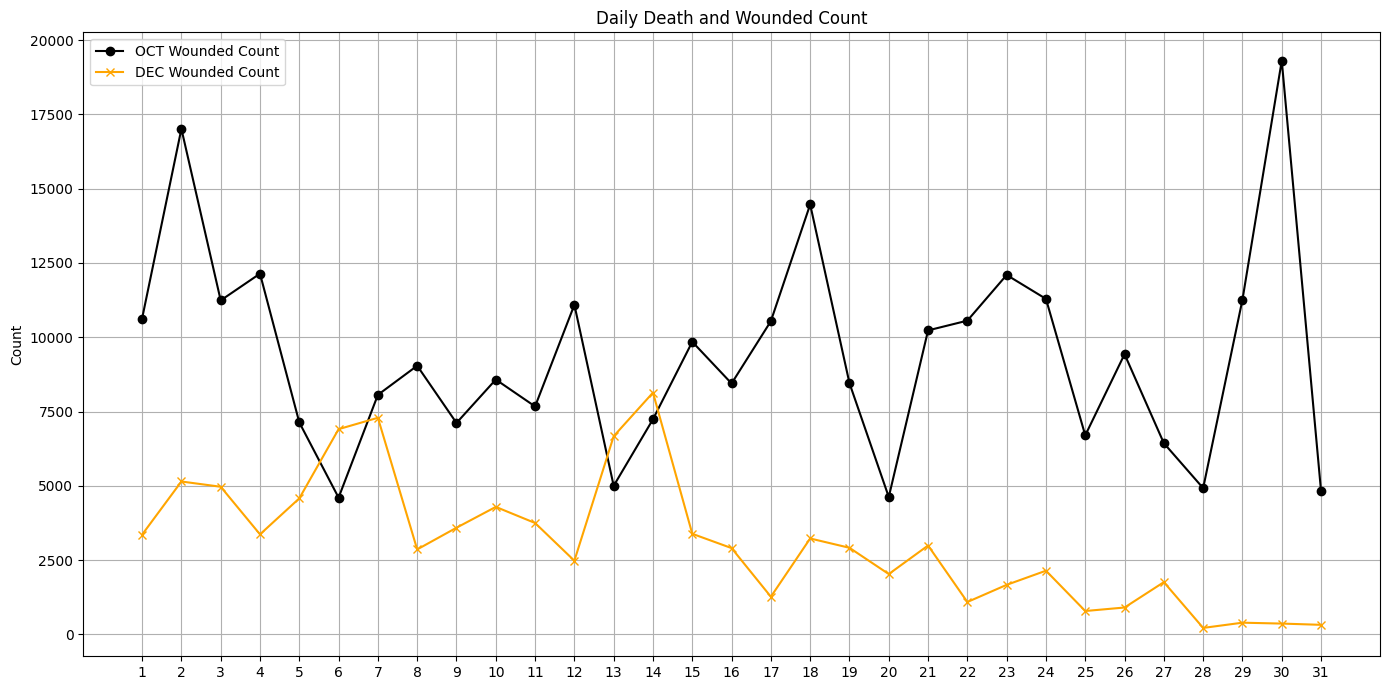

In [23]:
# OPT_DT의 형식을 datetime으로 변환하고 'Day' 열을 추가합니다.

CNT_10['OPT_DT'] = pd.to_datetime(CNT_10['OPT_DT'])
CNT_10['Day'] = CNT_10['OPT_DT'].dt.day
CNT_12['OPT_DT'] = pd.to_datetime(CNT_12['OPT_DT'])
CNT_12['Day'] = CNT_12['OPT_DT'].dt.day

# 사망자(DEATH_CNT)와 부상자(WND_CNT)의 일별 그래프를 그립니다.
plt.figure(figsize=(14, 7))

# 사망자 그래프
plt.plot(CNT_10['Day'], CNT_10['WND_CNT'], marker='o', linestyle='-', color='black', label='OCT Wounded Count')

# 부상자 그래프
plt.plot(CNT_12['Day'], CNT_12['WND_CNT'], marker='x', linestyle='-', color='orange', label='DEC Wounded Count')

# 그래프 제목 및 레이블 설정
plt.title('Daily Death and Wounded Count')
# plt.xlabel('Day of October 2019')
plt.ylabel('Count')
plt.xticks(CNT_10['Day'])  # 모든 일자를 x축에 표시합니다.

# 범례 추가
plt.legend()

# 그리드 추가
plt.grid(True)

# 그래프 표시
plt.tight_layout()
plt.show()


In [24]:
import pandas as pd

acc = pd.read_csv('/home/user/jin_jb/DTG/DATA/2019_TMC_T_W_ACC_INFO_GPS.csv')

acc['ACC_YMD'] = pd.to_datetime(acc['ACC_YMD'], format='%Y%m%d')

# 'ACC_YM'을 기준으로 데이터 정렬
acc = acc.sort_values(by='ACC_YMD')

# 정렬된 데이터의 처음 몇 줄 확인
acc = acc.reset_index(drop=True)

# DAY_CD 일요일: 1, 월요일: 2

acc = acc[['ACC_YMD','ACC_TME','DAY_CD','BJD_CD','ACC_PLC','ACC_GRD_CD','DEATH_CNT','SERI_CNT','SLTWD_CNT','WND_CNT','lon','lat']]

# ACC_TME를 문자열로 변환하고 HH:MM 형식으로 포맷팅
acc['ACC_TME_STR'] = acc['ACC_TME'].apply(lambda x: f"{str(x).zfill(4)[:2]}:{str(x).zfill(4)[2:]}")

# 시간만 추출하여 새로운 열 생성
acc['HOUR'] = acc['ACC_TME_STR'].str.split(':').str[0].astype(int)

# ACC_TME 열 제거
acc.drop('ACC_TME', axis=1, inplace=True)

# HOUR 열을 원하는 위치로 이동
# 여기서는 HOUR 열을 기존 ACC_TME 열이 있던 위치로 이동합니다.
hour_column = acc.pop('HOUR')
acc.insert(1, 'HOUR', hour_column)

acc.drop('ACC_TME_STR', axis=1, inplace=True)

daejeon_data = acc[acc['BJD_CD'].astype(str).str.startswith('30')]

# ACC_YMD와 HOUR 기준으로 정렬
dj_acc= daejeon_data.sort_values(by=['ACC_YMD', 'HOUR'])

# 인덱스 재설정
dj_acc.reset_index(drop=True, inplace=True)

# 'SERI_CNT', 'SLTWD_CNT', 'WND_CNT' 값을 합쳐서 'WND_CNT'에 저장
dj_acc['WND_CNT'] = dj_acc['SERI_CNT'] + dj_acc['SLTWD_CNT'] + dj_acc['WND_CNT']

# 'SERI_CNT'와 'SLTWD_CNT' 열을 제거
dj_acc.drop(['SERI_CNT', 'SLTWD_CNT'], axis=1, inplace=True)


dj_acc


/tmp/ipykernel_455369/3940909464.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  acc = pd.read_csv('/home/user/jin_jb/DTG/DATA/2019_TMC_T_W_ACC_INFO_GPS.csv')


,ACC_YMD,HOUR,DAY_CD,BJD_CD,ACC_PLC,ACC_GRD_CD,DEATH_CNT,WND_CNT,lon,lat
0,2019-01-01,3,3,3.020013e+09,호남지선고속도로 논산방향 논산기점 49km,3,0,1,127.372955,36.407769
1,2019-01-01,12,3,3.011010e+09,대전광역시 동구 은어송로51번길 29 손계남족발 앞 노상,2,0,1,127.454109,36.306999
2,2019-01-01,13,3,3.014010e+09,큰사랑약국 앞,3,0,1,127.415028,36.333411
3,2019-01-01,13,3,3.020011e+09,정림스토아 앞 네거리,3,0,1,127.332033,36.351625
4,2019-01-01,18,3,3.020014e+09,반석프라자 앞 노상 반석프라자 앞,4,0,1,127.313203,36.391300
...,...,...,...,...,...,...,...,...,...,...
8332,2019-12-31,20,3,3.014011e+09,0,2,0,1,127.435187,36.316078
8333,2019-12-31,22,3,3.020011e+09,도안호반베르디움2단지 후문 앞,3,0,3,127.346471,36.348741
8334,2019-12-31,22,3,3.023012e+09,대전광역시 대덕구 신탄진로 546 대전에서 신탄방향 상서삼거리 신호 앞,3,0,3,127.420927,36.427734
8335,2019-12-31,22,3,3.020014e+09,외삼네거리,2,0,1,127.311831,36.396221


In [25]:
acc_grd_counts = pd.DataFrame(dj_acc['ACC_GRD_CD'].value_counts()).reset_index()
acc_grd_counts

,ACC_GRD_CD,count
0,3,6258
1,2,1782
2,4,223
3,1,74


In [26]:
# ACC_GRD_CD로 그룹화하고 DEATH_CNT와 WND_CNT의 합계를 계산
grouped_data = dj_acc.groupby('ACC_GRD_CD')[['DEATH_CNT', 'WND_CNT']].sum().reset_index()
grouped_data


,ACC_GRD_CD,DEATH_CNT,WND_CNT
0,1,77,28
1,2,0,2855
2,3,0,9499
3,4,0,267


In [27]:
# 두 DataFrame을 ACC_GRD_CD를 기준으로 합치기
combined_data = pd.merge(grouped_data, acc_grd_counts, on='ACC_GRD_CD', how='left')

combined_data.rename(columns={'ACC_GRD_CD': 'Accident Grade', 'count': 'Frequency', 
                                       'DEATH_CNT': 'Death Count', 'WND_CNT': 'Wound Count'}, inplace=True)

# 열 순서를 재정의합니다.
new_order = ['Accident Grade', 'Frequency', 'Death Count', 'Wound Count']

# 열 순서를 바탕으로 데이터프레임을 재구성합니다.
combined_data = combined_data[new_order]

combined_data



,Accident Grade,Frequency,Death Count,Wound Count
0,1,74,77,28
1,2,1782,0,2855
2,3,6258,0,9499
3,4,223,0,267


In [28]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
GEO_DTG = pd.read_pickle("/home/user/jin_jb/DTG/DATA/GEO_DTG.pkl")
accidents_gdf = gpd.GeoDataFrame(GEO_DTG, geometry=gpd.points_from_xy(GEO_DTG.lon, GEO_DTG.lat))
accidents_gdf = accidents_gdf.drop(['TRANSCO_CD','CAR_REG_NO','TRIP_ID','OPT_SPD','DAY_CD'], axis = 1)
accidents_gdf

,OPT_DT,HOUR,Speeding,Long-term speeding,Sudden acceleration,Sudden start,Sudden deceleration,Sudden stop,Sudden left turn,Sudden right turn,...,Sudden overtaking,Sudden lane change,EMD_CD,EMD_NM,ACC_GRD_CD,DEATH_CNT,WND_CNT,lon,lat,geometry
0,2019-01-01,19,0,0,1,0,0,0,0,0,...,0,0,30170112,둔산동,1,1,0,127.379560,36.355946,POINT (127.37956 36.35595)
1,2019-01-01,19,1,0,0,0,0,0,0,0,...,0,0,30170112,둔산동,1,1,0,127.379560,36.355946,POINT (127.37956 36.35595)
2,2019-01-01,18,0,0,0,0,0,0,0,0,...,0,0,30170112,둔산동,3,0,2,127.379281,36.355766,POINT (127.37928 36.35577)
3,2019-01-01,18,0,0,0,0,0,0,0,0,...,0,0,30170112,둔산동,3,0,2,127.379281,36.355766,POINT (127.37928 36.35577)
4,2019-01-01,19,0,0,0,0,0,0,0,0,...,0,0,30170112,둔산동,1,1,0,127.379560,36.355946,POINT (127.37956 36.35595)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1863692,2019-12-31,11,0,0,0,0,0,0,0,0,...,0,0,30200130,화암동,3,0,1,127.377793,36.416744,POINT (127.37779 36.41674)
1863693,2019-12-31,11,1,0,0,0,0,0,0,0,...,0,0,30200130,화암동,3,0,1,127.377793,36.416744,POINT (127.37779 36.41674)
1863694,2019-12-31,10,0,0,1,0,0,0,0,0,...,0,0,30170116,관저동,2,0,2,127.334089,36.301538,POINT (127.33409 36.30154)
1863695,2019-12-31,10,0,0,1,0,0,0,0,0,...,0,0,30170116,관저동,2,0,2,127.334089,36.301538,POINT (127.33409 36.30154)


In [29]:
GEO_DTG

,OPT_DT,HOUR,TRANSCO_CD,CAR_REG_NO,TRIP_ID,OPT_SPD,Speeding,Long-term speeding,Sudden acceleration,Sudden start,...,Sudden overtaking,Sudden lane change,EMD_CD,EMD_NM,DAY_CD,ACC_GRD_CD,DEATH_CNT,WND_CNT,lon,lat
0,2019-01-01,19,17827,대전50바8429,C대전50바842919010117303000,26,0,0,1,0,...,0,0,30170112,둔산동,3,1,1,0,127.379560,36.355946
1,2019-01-01,19,17827,대전50바8429,C대전50바842919010117303000,90,1,0,0,0,...,0,0,30170112,둔산동,3,1,1,0,127.379560,36.355946
2,2019-01-01,18,17821,대전50바7636,C대전50바763619010103514200,60,0,0,0,0,...,0,0,30170112,둔산동,3,3,0,2,127.379281,36.355766
3,2019-01-01,18,17821,대전50바7636,C대전50바763619010103514200,60,0,0,0,0,...,0,0,30170112,둔산동,3,3,0,2,127.379281,36.355766
4,2019-01-01,19,17821,대전50바7636,C대전50바763619010103514200,60,0,0,0,0,...,0,0,30170112,둔산동,3,1,1,0,127.379560,36.355946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1863692,2019-12-31,11,29525,대구84아9597,C대구84아959719123110140000,146,0,0,0,0,...,0,0,30200130,화암동,3,3,0,1,127.377793,36.416744
1863693,2019-12-31,11,29525,대구84아9597,C대구84아959719123110140000,71,1,0,0,0,...,0,0,30200130,화암동,3,3,0,1,127.377793,36.416744
1863694,2019-12-31,10,29787,인천85아1835,C인천85아183519123110330000,15,0,0,1,0,...,0,0,30170116,관저동,3,2,0,2,127.334089,36.301538
1863695,2019-12-31,10,29787,인천85아1835,C인천85아183519123110330000,18,0,0,1,0,...,0,0,30170116,관저동,3,2,0,2,127.334089,36.301538


In [30]:
# ACC_GRD_CD로 그룹화하고 DEATH_CNT와 WND_CNT의 합계를 계산
ACC_GRD_DTG_cnt = GEO_DTG.groupby('ACC_GRD_CD')[['Speeding', 'Long-term speeding','Sudden acceleration','Sudden start','Sudden deceleration','Sudden stop',
                                              'Sudden left turn','Sudden right turn','Sudden U-turn','Sudden overtaking','Sudden lane change']].sum().reset_index()
# ACC_GRD_DTG_cnt['Total_Sum'] = ACC_GRD_DTG_cnt[['Speeding', 'Long-term speeding','Sudden acceleration','Sudden start','Sudden deceleration','Sudden stop',
#                                               'Sudden left turn','Sudden right turn','Sudden U-turn','Sudden overtaking','Sudden lane change']].sum(axis = 1)
ACC_GRD_DTG_cnt

,ACC_GRD_CD,Speeding,Long-term speeding,Sudden acceleration,Sudden start,Sudden deceleration,Sudden stop,Sudden left turn,Sudden right turn,Sudden U-turn,Sudden overtaking,Sudden lane change
0,1,1439,0,6205,16,2080,742,607,385,72,278,881
1,2,28607,0,168442,323,57834,19470,18798,10637,2339,8144,25357
2,3,103736,0,624694,1377,213505,72795,70127,39751,8984,29542,92412
3,4,3551,0,19337,29,7049,2421,2155,1371,284,889,2971


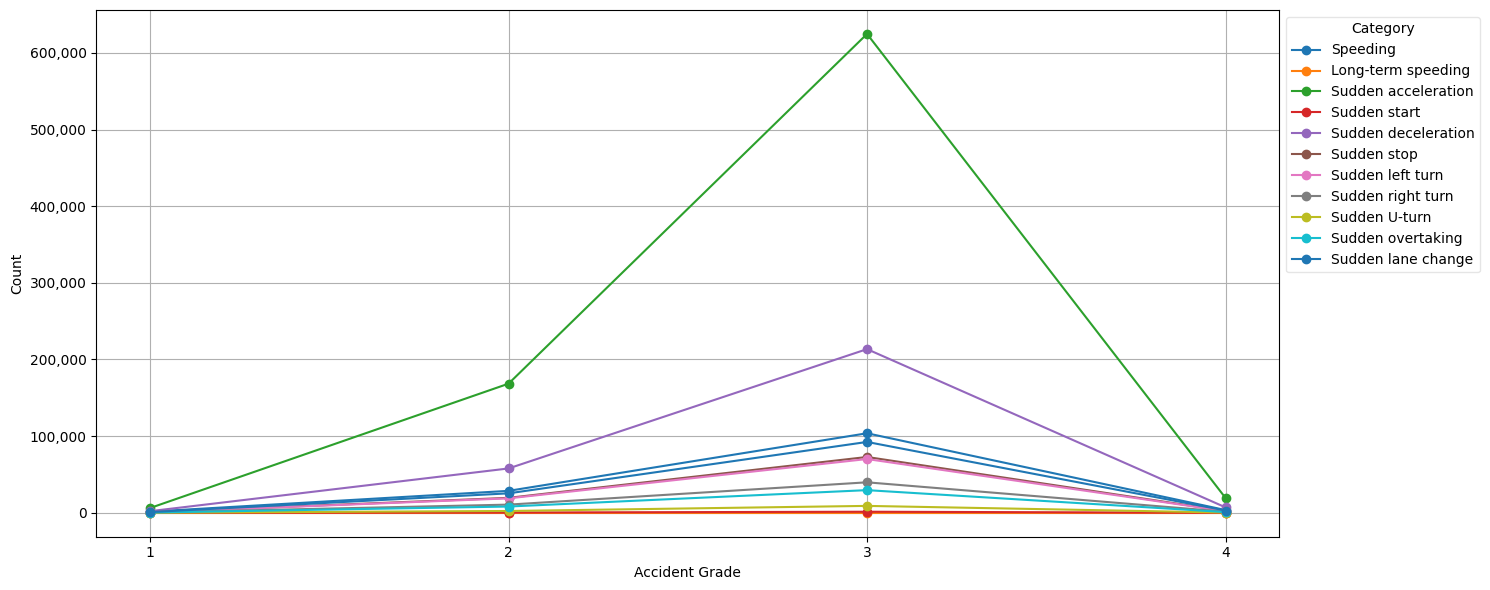

In [31]:
# 필요한 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

melted_data = ACC_GRD_DTG_cnt.melt(id_vars='ACC_GRD_CD', var_name='Category', value_name='Count')

# 그래프 그리기
plt.figure(figsize=(15, 6))

# 사고 등급별로 각 카테고리의 카운트를 그래프에 표시
for category in melted_data['Category'].unique():
    category_data = melted_data[melted_data['Category'] == category]
    plt.plot(category_data['ACC_GRD_CD'], category_data['Count'], marker='o', label=category)

plt.xticks(ticks=ACC_GRD_DTG_cnt['ACC_GRD_CD'], labels=ACC_GRD_DTG_cnt['ACC_GRD_CD'], rotation=0)
plt.xlabel('Accident Grade')
plt.ylabel('Count')
# plt.title('Count of Each Accident Grade by Category')

# y축 레이블 형식 변경
plt.gca().ticklabel_format(style='plain', axis='y')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# 레전드 설정
plt.legend(loc='upper left', bbox_to_anchor=(1,1), title='Category', framealpha=0.5)

plt.tight_layout()
plt.grid(True)
plt.show()

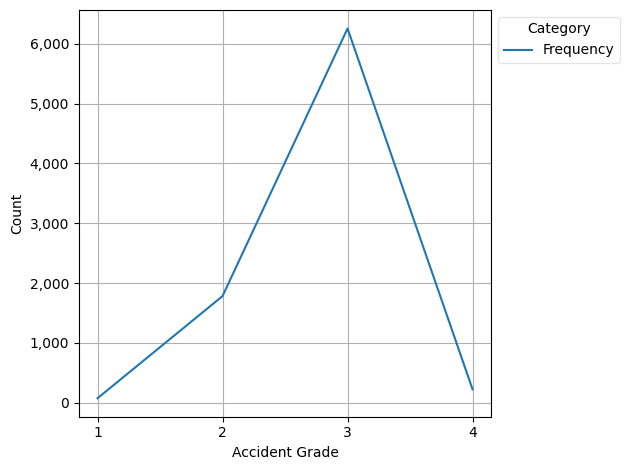

In [32]:
plt.plot(combined_data['Accident Grade'], combined_data['Frequency'], label='Frequency')

plt.xticks(ticks=combined_data['Accident Grade'], labels=combined_data['Accident Grade'], rotation=0)
plt.xlabel('Accident Grade')
plt.ylabel('Count')
# plt.title('Count of Each Accident Grade by Category')

# y축 레이블 형식 변경
plt.gca().ticklabel_format(style='plain', axis='y')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# 레전드 설정
plt.legend(loc='upper left', bbox_to_anchor=(1,1), title='Category', framealpha=0.5)

plt.tight_layout()
plt.grid(True)
plt.show()

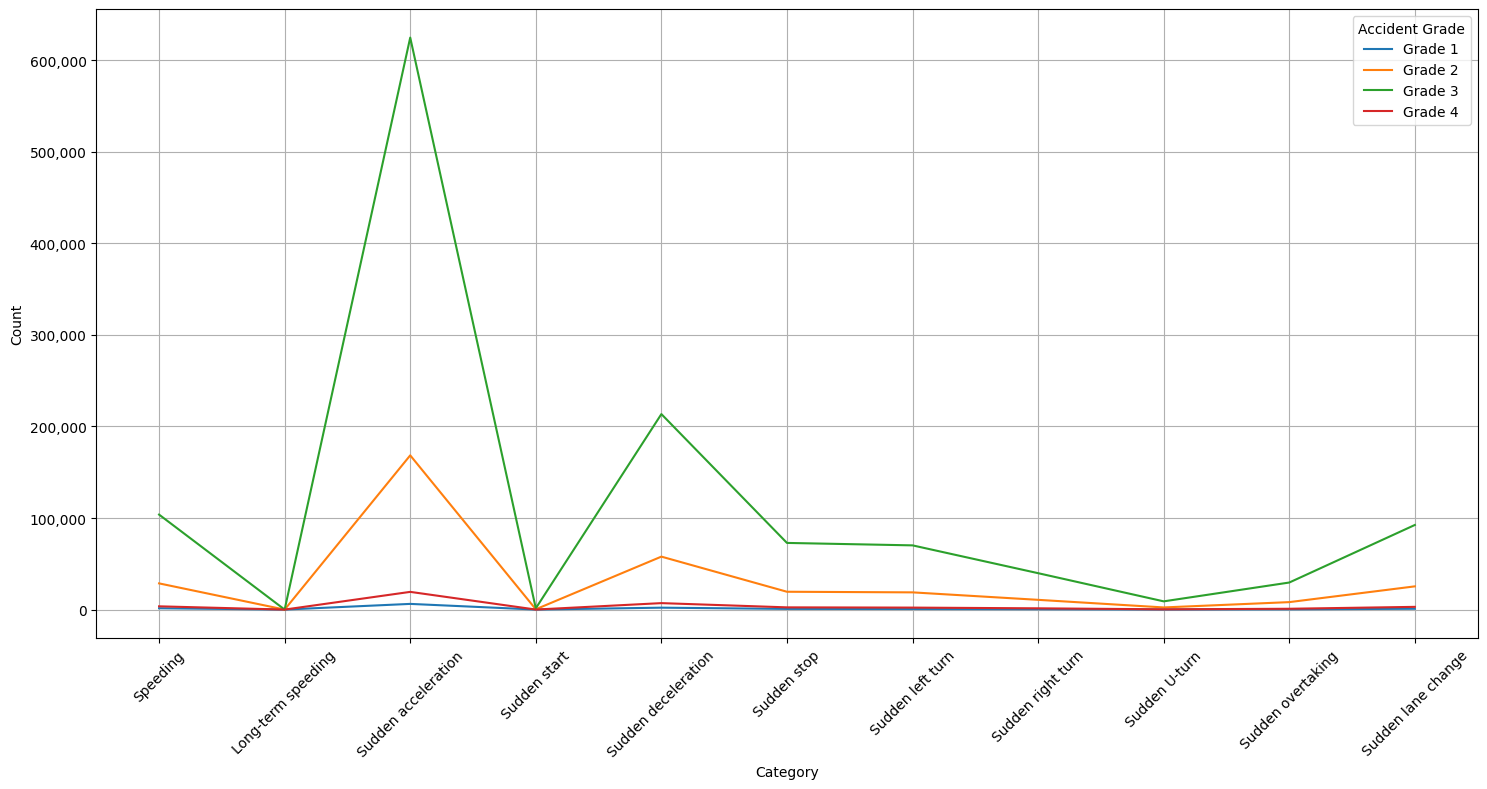

In [33]:
# 필요한 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

melted_data = ACC_GRD_DTG_cnt.melt(id_vars='ACC_GRD_CD', var_name='Category', value_name='Count')

# 그래프 그리기
plt.figure(figsize=(15, 8))

# 범주별로 각 사고 등급의 카운트를 그래프에 표시
categories = melted_data['Category'].unique()
for acc_grade in melted_data['ACC_GRD_CD'].unique():
    grade_data = melted_data[melted_data['ACC_GRD_CD'] == acc_grade]
    plt.plot(grade_data['Category'], grade_data['Count'], label=f'Grade {acc_grade}')
    

plt.xlabel('Category')
plt.ylabel('Count')
# plt.title('Count of Each Category by Accident Grade')

# Y축 레이블 형식 변경
plt.gca().ticklabel_format(style='plain', axis='y')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# 레전드 설정
plt.legend(title='Accident Grade')

plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

In [34]:
import numpy as np

daily_sum_01 = GEO_DTG_01.groupby('OPT_DT').agg({
    'Speeding': 'sum',
    'Long-term speeding': 'sum',
    'Sudden acceleration': 'sum',
    'Sudden start': 'sum',
    'Sudden deceleration': 'sum',
    'Sudden stop': 'sum',
    'Sudden left turn': 'sum',
    'Sudden right turn': 'sum',
    'Sudden U-turn': 'sum',
    'Sudden overtaking': 'sum',
    'Sudden lane change': 'sum',
    'DEATH_CNT': 'sum',
    'WND_CNT': 'sum'
})
CNT_01 = pd.DataFrame(daily_sum_01[["Sudden acceleration", "DEATH_CNT", "WND_CNT"]]).reset_index()

CNT_01['DayOfWeek'] = CNT_01['OPT_DT'].dt.dayofweek + 1

conditions = [
    (CNT_01['DayOfWeek'] == 6) | (CNT_01['DayOfWeek'] == 7),
    (CNT_01['OPT_DT'].dt.month == 1) & (CNT_01['OPT_DT'].dt.day == 1)
]
choices = ['Weekend', 'Weekend']
CNT_01['Weekday'] = np.select(conditions, choices, default='Weekday')

CNT_01[CNT_01['DEATH_CNT']!=0]

,OPT_DT,Sudden acceleration,DEATH_CNT,WND_CNT,DayOfWeek,Weekday
0,2019-01-01,2724,1532,5721,2,Weekend
6,2019-01-07,2187,268,8306,1,Weekday
13,2019-01-14,1771,318,7375,1,Weekday
14,2019-01-15,2096,26,10248,2,Weekday
23,2019-01-24,2998,394,8533,4,Weekday
26,2019-01-27,716,306,3485,7,Weekend


In [35]:
daily_sum_02 = GEO_DTG_02.groupby('OPT_DT').agg({
    'Speeding': 'sum',
    'Long-term speeding': 'sum',
    'Sudden acceleration': 'sum',
    'Sudden start': 'sum',
    'Sudden deceleration': 'sum',
    'Sudden stop': 'sum',
    'Sudden left turn': 'sum',
    'Sudden right turn': 'sum',
    'Sudden U-turn': 'sum',
    'Sudden overtaking': 'sum',
    'Sudden lane change': 'sum',
    'DEATH_CNT': 'sum',
    'WND_CNT': 'sum'
})
CNT_02 = pd.DataFrame(daily_sum_02[["Sudden acceleration", "DEATH_CNT", "WND_CNT"]]).reset_index()

CNT_02['DayOfWeek'] = CNT_02['OPT_DT'].dt.dayofweek + 1

conditions = [
    (CNT_02['DayOfWeek'] == 6) | (CNT_02['DayOfWeek'] == 7),
    (CNT_02['OPT_DT'].dt.month == 2) & (CNT_02['OPT_DT'].dt.day == 4) | (CNT_02['OPT_DT'].dt.day == 5) | (CNT_02['OPT_DT'].dt.day == 6)
]
choices = ['Weekend', 'Weekend']
CNT_02['Weekday'] = np.select(conditions, choices, default='Weekday')

CNT_02[CNT_02['DEATH_CNT']!=0]

,OPT_DT,Sudden acceleration,DEATH_CNT,WND_CNT,DayOfWeek,Weekday
1,2019-02-02,2626,37,8785,6,Weekend
3,2019-02-04,908,222,2571,1,Weekend
9,2019-02-10,1777,213,6156,7,Weekend
10,2019-02-11,3168,183,11305,1,Weekday
21,2019-02-22,3847,118,13796,5,Weekday


In [36]:
daily_sum_03 = GEO_DTG_03.groupby('OPT_DT').agg({
    'Speeding': 'sum',
    'Long-term speeding': 'sum',
    'Sudden acceleration': 'sum',
    'Sudden start': 'sum',
    'Sudden deceleration': 'sum',
    'Sudden stop': 'sum',
    'Sudden left turn': 'sum',
    'Sudden right turn': 'sum',
    'Sudden U-turn': 'sum',
    'Sudden overtaking': 'sum',
    'Sudden lane change': 'sum',
    'DEATH_CNT': 'sum',
    'WND_CNT': 'sum'
})
CNT_03 = pd.DataFrame(daily_sum_03[["Sudden acceleration", "DEATH_CNT", "WND_CNT"]]).reset_index()

CNT_03['DayOfWeek'] = CNT_03['OPT_DT'].dt.dayofweek + 1

conditions = [
    (CNT_03['DayOfWeek'] == 6) | (CNT_03['DayOfWeek'] == 7),
    (CNT_03['OPT_DT'].dt.month == 3) & (CNT_03['OPT_DT'].dt.day == 1)
] 
choices = ['Weekend', 'Weekend']
CNT_03['Weekday'] = np.select(conditions, choices, default='Weekday')

CNT_03[CNT_03['DEATH_CNT']!=0]

,OPT_DT,Sudden acceleration,DEATH_CNT,WND_CNT,DayOfWeek,Weekday
7,2019-03-08,5111,192,15055,5,Weekday
12,2019-03-13,3168,248,9569,3,Weekday
28,2019-03-29,2229,95,7346,5,Weekday


In [37]:
daily_sum_04 = GEO_DTG_04.groupby('OPT_DT').agg({
    'Speeding': 'sum',
    'Long-term speeding': 'sum',
    'Sudden acceleration': 'sum',
    'Sudden start': 'sum',
    'Sudden deceleration': 'sum',
    'Sudden stop': 'sum',
    'Sudden left turn': 'sum',
    'Sudden right turn': 'sum',
    'Sudden U-turn': 'sum',
    'Sudden overtaking': 'sum',
    'Sudden lane change': 'sum',
    'DEATH_CNT': 'sum',
    'WND_CNT': 'sum'
})
CNT_04 = pd.DataFrame(daily_sum_04[["Sudden acceleration", "DEATH_CNT", "WND_CNT"]]).reset_index()

CNT_04['DayOfWeek'] = CNT_04['OPT_DT'].dt.dayofweek + 1

conditions = [
    (CNT_04['DayOfWeek'] == 6) | (CNT_04['DayOfWeek'] == 7)
] 
choices = ['Weekend']
CNT_04['Weekday'] = np.select(conditions, choices, default='Weekday')

CNT_04[CNT_04['DEATH_CNT']!=0]

,OPT_DT,Sudden acceleration,DEATH_CNT,WND_CNT,DayOfWeek,Weekday
0,2019-04-01,2176,190,6885,1,Weekday
7,2019-04-08,2507,194,5394,1,Weekday
14,2019-04-15,3704,358,14404,1,Weekday
18,2019-04-19,2332,655,6298,5,Weekday
29,2019-04-30,3882,302,11460,2,Weekday


In [38]:
daily_sum_05 = GEO_DTG_05.groupby('OPT_DT').agg({
    'Speeding': 'sum',
    'Long-term speeding': 'sum',
    'Sudden acceleration': 'sum',
    'Sudden start': 'sum',
    'Sudden deceleration': 'sum',
    'Sudden stop': 'sum',
    'Sudden left turn': 'sum',
    'Sudden right turn': 'sum',
    'Sudden U-turn': 'sum',
    'Sudden overtaking': 'sum',
    'Sudden lane change': 'sum',
    'DEATH_CNT': 'sum',
    'WND_CNT': 'sum'
})
CNT_05 = pd.DataFrame(daily_sum_05[["Sudden acceleration", "DEATH_CNT", "WND_CNT"]]).reset_index()

CNT_05['DayOfWeek'] = CNT_05['OPT_DT'].dt.dayofweek + 1

conditions = [
    (CNT_05['DayOfWeek'] == 6) | (CNT_05['DayOfWeek'] == 7),
    (CNT_05['OPT_DT'].dt.month == 5) & (CNT_05['OPT_DT'].dt.day == 5) | (CNT_05['OPT_DT'].dt.day == 12)
] 
choices = ['Weekend', 'Weekend']
CNT_05['Weekday'] = np.select(conditions, choices, default='Weekday')

CNT_05[CNT_05['DEATH_CNT']!=0]

,OPT_DT,Sudden acceleration,DEATH_CNT,WND_CNT,DayOfWeek,Weekday
0,2019-05-01,1820,230,5126,3,Weekday
1,2019-05-02,3590,351,10203,4,Weekday
6,2019-05-07,3899,720,10209,2,Weekday
7,2019-05-08,3988,314,15952,3,Weekday
9,2019-05-10,2933,1,8033,5,Weekday
15,2019-05-16,2603,279,8388,4,Weekday
26,2019-05-27,2501,78,8443,1,Weekday
30,2019-05-31,4115,221,12296,5,Weekday


In [39]:
daily_sum_06 = GEO_DTG_06.groupby('OPT_DT').agg({
    'Speeding': 'sum',
    'Long-term speeding': 'sum',
    'Sudden acceleration': 'sum',
    'Sudden start': 'sum',
    'Sudden deceleration': 'sum',
    'Sudden stop': 'sum',
    'Sudden left turn': 'sum',
    'Sudden right turn': 'sum',
    'Sudden U-turn': 'sum',
    'Sudden overtaking': 'sum',
    'Sudden lane change': 'sum',
    'DEATH_CNT': 'sum',
    'WND_CNT': 'sum'
})
CNT_06 = pd.DataFrame(daily_sum_06[["Sudden acceleration", "DEATH_CNT", "WND_CNT"]]).reset_index()

CNT_06['DayOfWeek'] = CNT_06['OPT_DT'].dt.dayofweek + 1

conditions = [
    (CNT_06['DayOfWeek'] == 6) | (CNT_06['DayOfWeek'] == 7),
    (CNT_06['OPT_DT'].dt.month == 6) & (CNT_06['OPT_DT'].dt.day == 6)
] 
choices = ['Weekend', 'Weekend']
CNT_06['Weekday'] = np.select(conditions, choices, default='Weekday')

CNT_06[CNT_06['DEATH_CNT']!=0]

,OPT_DT,Sudden acceleration,DEATH_CNT,WND_CNT,DayOfWeek,Weekday
11,2019-06-12,2384,193,7878,3,Weekday
19,2019-06-20,3782,100,10306,4,Weekday


In [40]:
daily_sum_07 = GEO_DTG_07.groupby('OPT_DT').agg({
    'Speeding': 'sum',
    'Long-term speeding': 'sum',
    'Sudden acceleration': 'sum',
    'Sudden start': 'sum',
    'Sudden deceleration': 'sum',
    'Sudden stop': 'sum',
    'Sudden left turn': 'sum',
    'Sudden right turn': 'sum',
    'Sudden U-turn': 'sum',
    'Sudden overtaking': 'sum',
    'Sudden lane change': 'sum',
    'DEATH_CNT': 'sum',
    'WND_CNT': 'sum'
})
CNT_07 = pd.DataFrame(daily_sum_07[["Sudden acceleration", "DEATH_CNT", "WND_CNT"]]).reset_index()

CNT_07['DayOfWeek'] = CNT_07['OPT_DT'].dt.dayofweek + 1

conditions = [
    (CNT_07['DayOfWeek'] == 6) | (CNT_07['DayOfWeek'] == 7)
] 
choices = ['Weekend']
CNT_07['Weekday'] = np.select(conditions, choices, default='Weekday')

CNT_07[CNT_07['DEATH_CNT']!=0]

,OPT_DT,Sudden acceleration,DEATH_CNT,WND_CNT,DayOfWeek,Weekday
2,2019-07-03,1238,120,3884,3,Weekday
4,2019-07-05,3488,147,12677,5,Weekday
5,2019-07-06,2157,104,8869,6,Weekend
9,2019-07-10,3221,181,10595,3,Weekday
15,2019-07-16,1721,34,4744,2,Weekday
16,2019-07-17,1971,441,5023,3,Weekday
18,2019-07-19,2063,108,6009,5,Weekday
19,2019-07-20,1582,21,6733,6,Weekend
24,2019-07-25,2012,113,6204,4,Weekday
29,2019-07-30,2067,301,5993,2,Weekday


In [41]:
daily_sum_08 = GEO_DTG_08.groupby('OPT_DT').agg({
    'Speeding': 'sum',
    'Long-term speeding': 'sum',
    'Sudden acceleration': 'sum',
    'Sudden start': 'sum',
    'Sudden deceleration': 'sum',
    'Sudden stop': 'sum',
    'Sudden left turn': 'sum',
    'Sudden right turn': 'sum',
    'Sudden U-turn': 'sum',
    'Sudden overtaking': 'sum',
    'Sudden lane change': 'sum',
    'DEATH_CNT': 'sum',
    'WND_CNT': 'sum'
})
CNT_08 = pd.DataFrame(daily_sum_08[["Sudden acceleration", "DEATH_CNT", "WND_CNT"]]).reset_index()

CNT_08['DayOfWeek'] = CNT_08['OPT_DT'].dt.dayofweek + 1

conditions = [
    (CNT_08['DayOfWeek'] == 6) | (CNT_08['DayOfWeek'] == 7),
    (CNT_08['OPT_DT'].dt.month == 8) & (CNT_08['OPT_DT'].dt.day == 15)
] 
choices = ['Weekend', 'Weekend']
CNT_08['Weekday'] = np.select(conditions, choices, default='Weekday')

CNT_08[CNT_08['DEATH_CNT']!=0]

,OPT_DT,Sudden acceleration,DEATH_CNT,WND_CNT,DayOfWeek,Weekday
0,2019-08-01,1965,60,9089,4,Weekday
4,2019-08-05,2038,65,9348,1,Weekday
23,2019-08-24,2937,369,9874,6,Weekend
24,2019-08-25,1243,435,4223,7,Weekend
28,2019-08-29,4113,252,11480,4,Weekday


In [42]:
daily_sum_09 = GEO_DTG_09.groupby('OPT_DT').agg({
    'Speeding': 'sum',
    'Long-term speeding': 'sum',
    'Sudden acceleration': 'sum',
    'Sudden start': 'sum',
    'Sudden deceleration': 'sum',
    'Sudden stop': 'sum',
    'Sudden left turn': 'sum',
    'Sudden right turn': 'sum',
    'Sudden U-turn': 'sum',
    'Sudden overtaking': 'sum',
    'Sudden lane change': 'sum',
    'DEATH_CNT': 'sum',
    'WND_CNT': 'sum'
})
CNT_09 = pd.DataFrame(daily_sum_09[["Sudden acceleration", "DEATH_CNT", "WND_CNT"]]).reset_index()

CNT_09['DayOfWeek'] = CNT_09['OPT_DT'].dt.dayofweek + 1

conditions = [
    (CNT_09['DayOfWeek'] == 6) | (CNT_09['DayOfWeek'] == 7),
    (CNT_09['OPT_DT'].dt.month == 9) & (CNT_09['OPT_DT'].dt.day == 12) | (CNT_09['OPT_DT'].dt.day == 13) | (CNT_09['OPT_DT'].dt.day == 14)
] 
choices = ['Weekend', 'Weekend']
CNT_09['Weekday'] = np.select(conditions, choices, default='Weekday')

CNT_09[CNT_09['DEATH_CNT']!=0]

,OPT_DT,Sudden acceleration,DEATH_CNT,WND_CNT,DayOfWeek,Weekday
4,2019-09-05,2041,618,6273,4,Weekday
10,2019-09-11,3128,146,10998,3,Weekday
17,2019-09-18,2169,104,6570,3,Weekday
20,2019-09-21,4483,372,15912,6,Weekend
23,2019-09-24,3373,232,8795,2,Weekday
29,2019-09-30,3672,469,11139,1,Weekday


In [43]:
daily_sum_10 = GEO_DTG_10.groupby('OPT_DT').agg({
    'Speeding': 'sum',
    'Long-term speeding': 'sum',
    'Sudden acceleration': 'sum',
    'Sudden start': 'sum',
    'Sudden deceleration': 'sum',
    'Sudden stop': 'sum',
    'Sudden left turn': 'sum',
    'Sudden right turn': 'sum',
    'Sudden U-turn': 'sum',
    'Sudden overtaking': 'sum',
    'Sudden lane change': 'sum',
    'DEATH_CNT': 'sum',
    'WND_CNT': 'sum'
})
CNT_10 = pd.DataFrame(daily_sum_10[["Sudden acceleration", "DEATH_CNT", "WND_CNT"]]).reset_index()
#10월 3일 목요일 개천절, 10월 9일 수요일 한글날
CNT_10['DayOfWeek'] = CNT_10['OPT_DT'].dt.dayofweek + 1

conditions = [
    (CNT_10['DayOfWeek'] == 6) | (CNT_10['DayOfWeek'] == 7),
    (CNT_10['OPT_DT'].dt.month == 10) & ((CNT_10['OPT_DT'].dt.day == 3) | (CNT_10['OPT_DT'].dt.day == 9))
]
choices = ['Weekend', 'Weekend']
CNT_10['Weekday'] = np.select(conditions, choices, default='Weekday')

CNT_10[CNT_10['DEATH_CNT']!=0]

,OPT_DT,Sudden acceleration,DEATH_CNT,WND_CNT,DayOfWeek,Weekday
0,2019-10-01,3622,118,10631,2,Weekday
16,2019-10-17,3914,172,10542,4,Weekday
25,2019-10-26,2253,112,9430,6,Weekend
30,2019-10-31,1991,20,4818,4,Weekday


In [44]:
daily_sum_11 = GEO_DTG_11.groupby('OPT_DT').agg({
    'Speeding': 'sum',
    'Long-term speeding': 'sum',
    'Sudden acceleration': 'sum',
    'Sudden start': 'sum',
    'Sudden deceleration': 'sum',
    'Sudden stop': 'sum',
    'Sudden left turn': 'sum',
    'Sudden right turn': 'sum',
    'Sudden U-turn': 'sum',
    'Sudden overtaking': 'sum',
    'Sudden lane change': 'sum',
    'DEATH_CNT': 'sum',
    'WND_CNT': 'sum'
})
CNT_11 = pd.DataFrame(daily_sum_11[["Sudden acceleration", "DEATH_CNT", "WND_CNT"]]).reset_index()

CNT_11['DayOfWeek'] = CNT_11['OPT_DT'].dt.dayofweek + 1

conditions = [
    (CNT_11['DayOfWeek'] == 6) | (CNT_11['DayOfWeek'] == 7)
] 
choices = ['Weekend']
CNT_11['Weekday'] = np.select(conditions, choices, default='Weekday')

CNT_11[CNT_11['DEATH_CNT']!=0]

,OPT_DT,Sudden acceleration,DEATH_CNT,WND_CNT,DayOfWeek,Weekday
0,2019-11-01,2835,227,11591,5,Weekday
2,2019-11-03,1082,85,3023,7,Weekend
10,2019-11-11,3578,392,9065,1,Weekday
12,2019-11-13,2952,108,6481,3,Weekday
18,2019-11-19,3370,472,9665,2,Weekday
22,2019-11-23,2811,143,10455,6,Weekend
23,2019-11-24,1235,28,4315,7,Weekend
27,2019-11-28,3178,10,8350,4,Weekday


In [45]:
daily_sum_12 = GEO_DTG_12.groupby('OPT_DT').agg({
    'Speeding': 'sum',
    'Long-term speeding': 'sum',
    'Sudden acceleration': 'sum',
    'Sudden start': 'sum',
    'Sudden deceleration': 'sum',
    'Sudden stop': 'sum',
    'Sudden left turn': 'sum',
    'Sudden right turn': 'sum',
    'Sudden U-turn': 'sum',
    'Sudden overtaking': 'sum',
    'Sudden lane change': 'sum',
    'DEATH_CNT': 'sum',
    'WND_CNT': 'sum'
})
CNT_12 = pd.DataFrame(daily_sum_12[["Sudden acceleration", "DEATH_CNT", "WND_CNT"]]).reset_index()

CNT_12['DayOfWeek'] = CNT_12['OPT_DT'].dt.dayofweek + 1

conditions = [
    (CNT_12['DayOfWeek'] == 6) | (CNT_12['DayOfWeek'] == 7),
    (CNT_12['OPT_DT'].dt.month == 12) & (CNT_12['OPT_DT'].dt.day == 25)
] 
choices = ['Weekend', 'Weekend']
CNT_12['Weekday'] = np.select(conditions, choices, default='Weekday')

CNT_12[CNT_12['DEATH_CNT']!=0]

,OPT_DT,Sudden acceleration,DEATH_CNT,WND_CNT,DayOfWeek,Weekday
0,2019-12-01,865,91,3355,7,Weekend
4,2019-12-05,1865,77,4576,4,Weekday
8,2019-12-09,1504,72,3588,1,Weekday
9,2019-12-10,1495,62,4289,2,Weekday
18,2019-12-19,1133,22,2912,4,Weekday


In [46]:
GEO_DTG_12

,OPT_DT,HOUR,TRANSCO_CD,CAR_REG_NO,TRIP_ID,OPT_SPD,Speeding,Long-term speeding,Sudden acceleration,Sudden start,...,Sudden overtaking,Sudden lane change,EMD_CD,EMD_NM,DAY_CD,ACC_GRD_CD,DEATH_CNT,WND_CNT,lon,lat
0,2019-12-01,15,17824,대전50바8535,C대전50바853519120114430400,29,0,0,1,0,...,0,0,30170112,둔산동,1,3,0,1,127.375065,36.350758
1,2019-12-01,23,17836,대전50바5138,C대전50바513819120121090000,46,0,0,0,0,...,0,0,30200127,도룡동,1,3,0,1,127.391750,36.374295
2,2019-12-01,23,17836,대전50바5138,C대전50바513819120121090000,29,0,0,0,0,...,0,0,30200127,도룡동,1,3,0,1,127.391750,36.374295
3,2019-12-01,23,17836,대전50바5138,C대전50바513819120121090000,20,0,0,1,0,...,0,0,30200127,도룡동,1,3,0,1,127.391750,36.374295
4,2019-12-01,17,1386,대전75자9021,C대전75자902119120105061000,23,0,0,1,0,...,0,0,30140107,석교동,1,3,0,2,127.444840,36.308249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66070,2019-12-31,11,29525,대구84아9597,C대구84아959719123110140000,146,0,0,0,0,...,0,0,30200130,화암동,3,3,0,1,127.377793,36.416744
66071,2019-12-31,11,29525,대구84아9597,C대구84아959719123110140000,71,1,0,0,0,...,0,0,30200130,화암동,3,3,0,1,127.377793,36.416744
66072,2019-12-31,10,29787,인천85아1835,C인천85아183519123110330000,15,0,0,1,0,...,0,0,30170116,관저동,3,2,0,2,127.334089,36.301538
66073,2019-12-31,10,29787,인천85아1835,C인천85아183519123110330000,18,0,0,1,0,...,0,0,30170116,관저동,3,2,0,2,127.334089,36.301538


In [47]:
CNT_01[CNT_01['DEATH_CNT']!=0]
CNT_02[CNT_02['DEATH_CNT']!=0]
CNT_03[CNT_03['DEATH_CNT']!=0]
CNT_04[CNT_04['DEATH_CNT']!=0]
CNT_05[CNT_05['DEATH_CNT']!=0]
CNT_06[CNT_06['DEATH_CNT']!=0]
CNT_07[CNT_07['DEATH_CNT']!=0]
CNT_08[CNT_08['DEATH_CNT']!=0]
CNT_09[CNT_09['DEATH_CNT']!=0]
CNT_10[CNT_10['DEATH_CNT']!=0]
CNT_11[CNT_11['DEATH_CNT']!=0]
CNT_12[CNT_12['DEATH_CNT']!=0]

,OPT_DT,Sudden acceleration,DEATH_CNT,WND_CNT,DayOfWeek,Weekday
0,2019-12-01,865,91,3355,7,Weekend
4,2019-12-05,1865,77,4576,4,Weekday
8,2019-12-09,1504,72,3588,1,Weekday
9,2019-12-10,1495,62,4289,2,Weekday
18,2019-12-19,1133,22,2912,4,Weekday


In [48]:
import pandas as pd
CNT = pd.concat([CNT_01[CNT_01['DEATH_CNT']!=0],
                 CNT_02[CNT_02['DEATH_CNT']!=0],
                 CNT_03[CNT_03['DEATH_CNT']!=0],
                 CNT_04[CNT_04['DEATH_CNT']!=0],
                 CNT_05[CNT_05['DEATH_CNT']!=0],
                 CNT_06[CNT_06['DEATH_CNT']!=0],
                 CNT_07[CNT_07['DEATH_CNT']!=0],
                 CNT_08[CNT_08['DEATH_CNT']!=0],
                 CNT_09[CNT_09['DEATH_CNT']!=0],
                 CNT_10[CNT_10['DEATH_CNT']!=0],
                 CNT_11[CNT_11['DEATH_CNT']!=0],
                 CNT_12[CNT_12['DEATH_CNT']!=0]])

CNT.reset_index(drop = True, inplace = True)

CNT

,OPT_DT,Sudden acceleration,DEATH_CNT,WND_CNT,DayOfWeek,Weekday
0,2019-01-01,2724,1532,5721,2,Weekend
1,2019-01-07,2187,268,8306,1,Weekday
2,2019-01-14,1771,318,7375,1,Weekday
3,2019-01-15,2096,26,10248,2,Weekday
4,2019-01-24,2998,394,8533,4,Weekday
...,...,...,...,...,...,...
62,2019-12-01,865,91,3355,7,Weekend
63,2019-12-05,1865,77,4576,4,Weekday
64,2019-12-09,1504,72,3588,1,Weekday
65,2019-12-10,1495,62,4289,2,Weekday


In [49]:
acc_death = pd.DataFrame(dj_acc.groupby('ACC_YMD')[['DEATH_CNT','WND_CNT']].sum())
acc_death_cnt = acc_death[acc_death['DEATH_CNT']!=0]
acc_death_cnt = acc_death_cnt.reset_index()
acc_death_cnt

,ACC_YMD,DEATH_CNT,WND_CNT
0,2019-01-01,1,11
1,2019-01-07,1,29
2,2019-01-14,1,38
3,2019-01-15,1,33
4,2019-01-24,1,27
...,...,...,...
62,2019-12-01,1,26
63,2019-12-05,1,38
64,2019-12-09,1,24
65,2019-12-10,1,31


In [50]:
# 데이터프레임 생성
CNT_death = pd.DataFrame(CNT)
acc_death_cnt = pd.DataFrame(acc_death_cnt).set_index('ACC_YMD')

# OPT_DT를 인덱스로 설정하여 CNT_death 데이터프레임을 업데이트합니다.
CNT_death.set_index('OPT_DT', inplace=True)
CNT_death.update(acc_death_cnt)

# 인덱스 이름을 'ACC_YMD'로 변경합니다.
CNT_death.index.name = 'ACC_YMD'

# 결과 확인
CNT_death.reset_index(inplace=True)  # 인덱스를 컬럼으로 변환하여 결과를 보기 쉽게 합니다.

CNT_death.rename(columns={'ACC_YMD': 'OPT_DT'}, inplace=True)

CNT_death

,OPT_DT,Sudden acceleration,DEATH_CNT,WND_CNT,DayOfWeek,Weekday
0,2019-01-01,2724,1,11,2,Weekend
1,2019-01-07,2187,1,29,1,Weekday
2,2019-01-14,1771,1,38,1,Weekday
3,2019-01-15,2096,1,33,2,Weekday
4,2019-01-24,2998,1,27,4,Weekday
...,...,...,...,...,...,...
62,2019-12-01,865,1,26,7,Weekend
63,2019-12-05,1865,1,38,4,Weekday
64,2019-12-09,1504,1,24,1,Weekday
65,2019-12-10,1495,1,31,2,Weekday


In [51]:
import pandas as pd
CNT_2 = pd.concat([CNT_01[CNT_01['DEATH_CNT']==0],
                 CNT_02[CNT_02['DEATH_CNT']==0],
                 CNT_03[CNT_03['DEATH_CNT']==0],
                 CNT_04[CNT_04['DEATH_CNT']==0],
                 CNT_05[CNT_05['DEATH_CNT']==0],
                 CNT_06[CNT_06['DEATH_CNT']==0],
                 CNT_07[CNT_07['DEATH_CNT']==0],
                 CNT_08[CNT_08['DEATH_CNT']==0],
                 CNT_09[CNT_09['DEATH_CNT']==0],
                 CNT_10[CNT_10['DEATH_CNT']==0],
                 CNT_11[CNT_11['DEATH_CNT']==0],
                 CNT_12[CNT_12['DEATH_CNT']==0]])

CNT_2.reset_index(drop = True, inplace = True)

CNT_2

,OPT_DT,Sudden acceleration,DEATH_CNT,WND_CNT,DayOfWeek,Weekday
0,2019-01-02,2929,0,8777,3,Weekday
1,2019-01-03,3798,0,9949,4,Weekday
2,2019-01-04,4324,0,12926,5,Weekday
3,2019-01-05,1974,0,9545,6,Weekend
4,2019-01-06,768,0,3607,7,Weekend
...,...,...,...,...,...,...
293,2019-12-27,552,0,1756,5,Weekday
294,2019-12-28,63,0,215,6,Weekend
295,2019-12-29,123,0,391,7,Weekend
296,2019-12-30,155,0,361,1,Weekday


In [52]:
acc_wound = pd.DataFrame(dj_acc.groupby('ACC_YMD')[['DEATH_CNT','WND_CNT']].sum())
acc_wound_cnt = acc_wound[acc_wound['DEATH_CNT']==0]
acc_wound_cnt = acc_wound_cnt.reset_index()
acc_wound_cnt

,ACC_YMD,DEATH_CNT,WND_CNT
0,2019-01-02,0,23
1,2019-01-03,0,24
2,2019-01-04,0,36
3,2019-01-05,0,42
4,2019-01-06,0,24
...,...,...,...
293,2019-12-27,0,53
294,2019-12-28,0,19
295,2019-12-29,0,20
296,2019-12-30,0,29


In [53]:
# 데이터프레임 생성
CNT_wound = pd.DataFrame(CNT_2)
acc_wound_cnt = pd.DataFrame(acc_wound_cnt).set_index('ACC_YMD')

# OPT_DT를 인덱스로 설정하여 CNT_wound 데이터프레임을 업데이트합니다.
CNT_wound.set_index('OPT_DT', inplace=True)
CNT_wound.update(acc_wound_cnt)

# 인덱스 이름을 'ACC_YMD'로 변경합니다.
CNT_wound.index.name = 'ACC_YMD'

# 결과 확인
CNT_wound.reset_index(inplace=True)  # 인덱스를 컬럼으로 변환하여 결과를 보기 쉽게 합니다.

CNT_wound.rename(columns={'ACC_YMD': 'OPT_DT'}, inplace=True)

CNT_wound = CNT_wound.drop(['DEATH_CNT'],axis = 1)
CNT_wound


,OPT_DT,Sudden acceleration,WND_CNT,DayOfWeek,Weekday
0,2019-01-02,2929,23,3,Weekday
1,2019-01-03,3798,24,4,Weekday
2,2019-01-04,4324,36,5,Weekday
3,2019-01-05,1974,42,6,Weekend
4,2019-01-06,768,24,7,Weekend
...,...,...,...,...,...
293,2019-12-27,552,53,5,Weekday
294,2019-12-28,63,19,6,Weekend
295,2019-12-29,123,20,7,Weekend
296,2019-12-30,155,29,1,Weekday


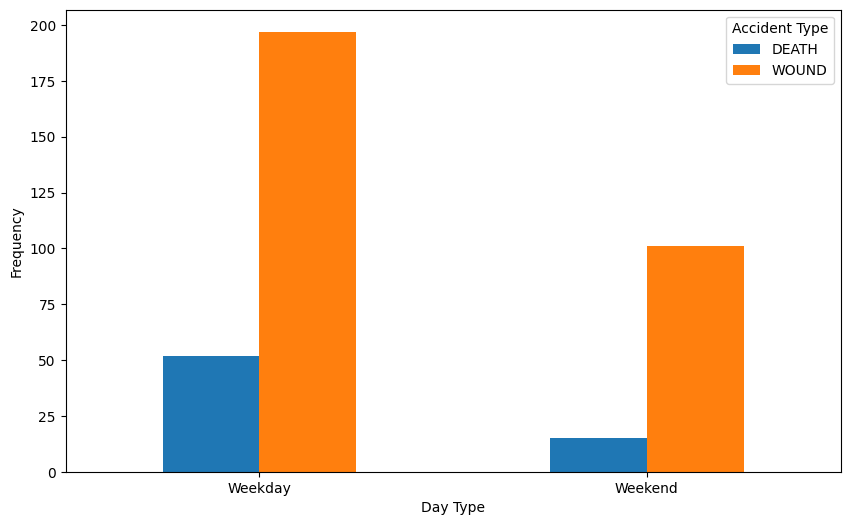

In [54]:
# 주중과 주말 데이터를 각각 카운트
weekday_counts = {
    "DEATH": CNT_death['Weekday'].value_counts(),
    "WOUND": CNT_wound['Weekday'].value_counts()
}

# 결과를 데이터프레임으로 변환
weekday_counts_df = pd.DataFrame(weekday_counts)

# 시각화
import matplotlib.pyplot as plt

weekday_counts_df.plot(kind='bar', figsize=(10, 6))
# plt.title('Frequency of Accidents Involving Deaths and Injuries by Weekday/Weekend')
plt.xlabel('Day Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(title='Accident Type')
plt.show()

In [55]:
CNT_death['Sudden acceleration'].mean()

2595.626865671642

In [56]:
CNT_wound['Sudden acceleration'].mean()

2163.6610738255035

In [57]:
CNT_death[CNT_death['Weekday']== 'Weekday']['Sudden acceleration'].mean()

2779.0

In [58]:
CNT_death[CNT_death['Weekday'] != 'Weekday']['Sudden acceleration'].mean()

1959.9333333333334

In [59]:
CNT_wound[CNT_wound['Weekday']== 'Weekday']['Sudden acceleration'].mean()

2477.6903553299494

In [60]:
CNT_wound[CNT_wound['Weekday'] != 'Weekday']['Sudden acceleration'].mean()

1551.148514851485